In [ ]:
from google.colab import drive 
drive.mount('Colab_Notebooks')

In [ ]:
#import pandas package
import pandas as pd
#load csv data into pandas dataframe
import numpy as np
#filtering stopwords
df=pd.read_csv('/content/Colab_Notebooks/MyDrive//2018.csv')
tweets=''
for tweet in df['tweet']:
  tweets += tweet + ' '
tweets

'@Ben757677 @vincent13031925 Thanks Tesla owners in China! Looking forward to visiting soon for the groundbreaking of Gigafactory Shanghai! @Grimezsz Turns out if you take Dayquil, you exit The Matrix Excited to have Larry Ellison &amp; Kathleen Wilson-Thompson join the Tesla board!  https://t.co/CQyvkgsCsT @NutmegTheRed @Tesla Ok @westcoastbill Tesla team did a great job! @teslaownersSV @alexraikos 2020 @alexraikos Yes @SeanABragg @EcoHeliGuy @13ericralph31 @NCBirbhan @AwakenedParadi1 @demishassabis I will provide a detailed explanation in March/April @EcoHeliGuy @13ericralph31 @NCBirbhan @AwakenedParadi1 @demishassabis Time. Although it also turned out to be dramatically better. @13ericralph31 @NCBirbhan @AwakenedParadi1 @demishassabis Exactly @Kristennetten @13ericralph31 @AwakenedParadi1 @demishassabis Yes @13ericralph31 @AwakenedParadi1 @demishassabis Probability at 60% &amp; rising rapidly due to new architecture @AwakenedParadi1 @demishassabis 30% @demishassabis Congratulations 


1. Compute word frequencies for each year. Exclude the stop words

In [ ]:
import nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('word_tokenize')
all_words = word_tokenize(tweets)
stop_words = set(stopwords.words('english'))
stop_words.update(['@', ',', 'A', '.', ':', ';', '&', 'I', '!', '’', ')', '(', '🤣', '?', 'The', '“', '”', 'We', 'In', 'It', 'This', 'If'])
filtered_words = []
for word in all_words:
    if word not in stop_words:
        filtered_words.append(word)

word_analysis = nltk.FreqDist(filtered_words)
word_analysis.items()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


dict_items([('Ben757677', 1), ('vincent13031925', 16), ('Thanks', 41), ('Tesla', 450), ('owners', 11), ('China', 17), ('Looking', 8), ('forward', 8), ('visiting', 1), ('soon', 49), ('groundbreaking', 1), ('Gigafactory', 5), ('Shanghai', 1), ('Grimezsz', 12), ('Turns', 5), ('take', 26), ('Dayquil', 1), ('exit', 5), ('Matrix', 1), ('Excited', 2), ('Larry', 1), ('Ellison', 1), ('amp', 527), ('Kathleen', 1), ('Wilson-Thompson', 1), ('join', 4), ('board', 4), ('https', 323), ('//t.co/CQyvkgsCsT', 1), ('NutmegTheRed', 1), ('Ok', 23), ('westcoastbill', 6), ('team', 40), ('great', 42), ('job', 6), ('teslaownersSV', 3), ('alexraikos', 2), ('2020', 4), ('Yes', 101), ('SeanABragg', 1), ('EcoHeliGuy', 3), ('13ericralph31', 8), ('NCBirbhan', 3), ('AwakenedParadi1', 6), ('demishassabis', 7), ('provide', 6), ('detailed', 2), ('explanation', 2), ('March/April', 2), ('Time', 3), ('Although', 3), ('also', 28), ('turned', 4), ('dramatically', 5), ('better', 49), ('Exactly', 37), ('Kristennetten', 2), ('P

 2. Show top 10 words (for each year) by the highest value of word frequency


In [ ]:
word_analysis.tabulate(10)

   amp  Tesla  https    car      3    Yes  Model   like      … SpaceX 
   527    450    323    113    105    101     96     90     89     88 


3. Plot histogram of word frequencies for each year

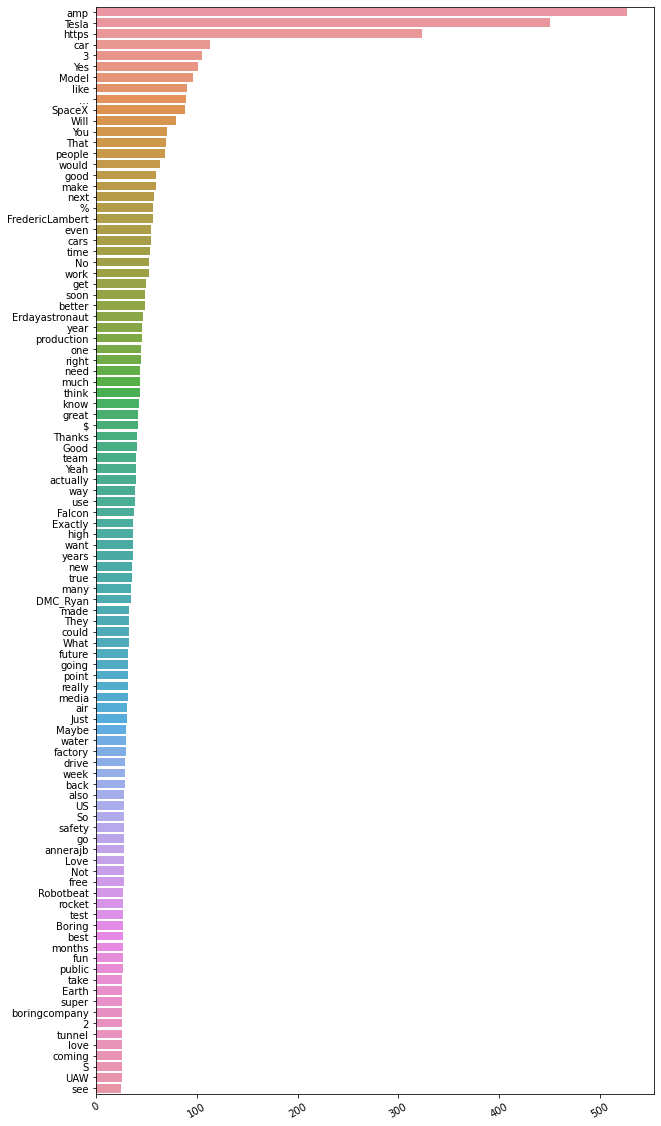

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
word_analysis_data_series = pd.Series(dict(word_analysis.most_common(100)))
# word_analysis_data_series = pd.Series(dict(word_analysis))

fig, ax = plt.subplots(figsize=(10,20))

word_frequency_plot = sns.barplot(y=word_analysis_data_series.index, x=word_analysis_data_series.values, ax=ax)
plt.xticks(rotation=30);

4. Use Zipf’s law and plot log-log plots of word frequencies and rank for each year

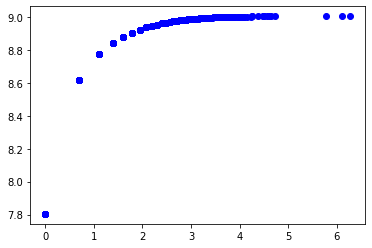

In [ ]:
import scipy.stats as ss
import math
word_rank = ss.rankdata([freq for freq in word_analysis.values()])
log_freq = [math.log(freq) for freq in word_analysis.values()]
log_rank = [math.log(rank) for rank in word_rank]
plt.plot(log_freq, log_rank, 'bo')

5. Create bigram network graphs for each year

In [ ]:
bigram_words = list(nltk.bigrams(filtered_words))
bigram_word_analysis = nltk.FreqDist(bigram_words)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128059 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129504 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129303 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  fon

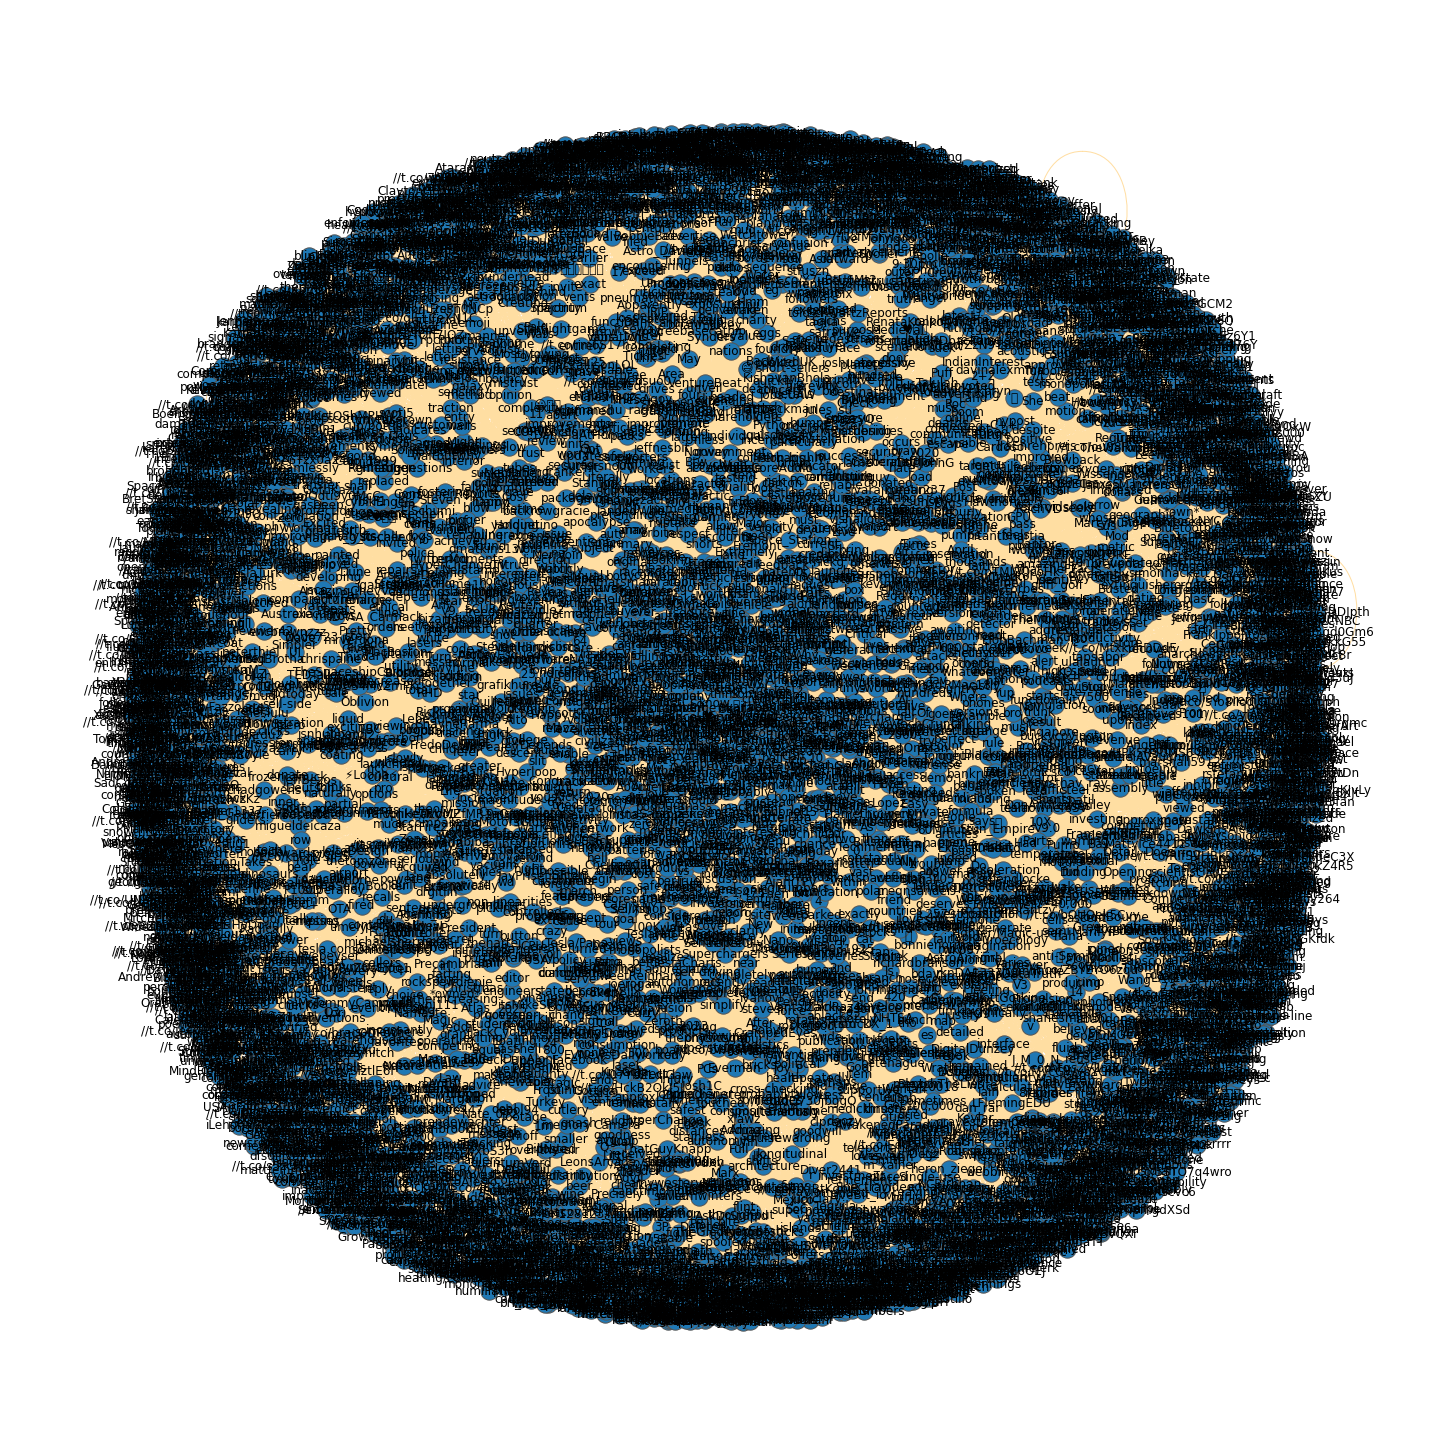

In [ ]:
import networkx as nx
G = nx.Graph()
for index, row in bigram_word_analysis.most_common():
  G.add_weighted_edges_from([(index[0], index[1], row)])  

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
# nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=50))
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()